In [249]:
pwd

'C:\\Users\\Utkarsh\\Desktop'

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import datetime
from pandas import Series
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df = pd.read_excel ('C:\\Users\\Utkarsh\\Desktop\\NiftyPrices.xlsx')
df1 = pd.read_excel ('C:\\Users\\Utkarsh\\Desktop\\df.xlsx')
returns= pd.read_excel ('C:\\Users\\Utkarsh\\Desktop\\NiftyReturns.xlsx') 
#relations= pd.read_excel ('C:\\Users\\Utkarsh\\Desktop\\RelationsNifty50.xlsx') 

In [251]:
df.head()

,Date,Nifty 50,change in prices,change in prices per unit,Nifty 50 Returns,Normalizedchangeinprice,NormalizedchangeinVolumesTraded,Difference,Turnover
0,2008-12-31,2959.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,3033.45,74.30,0.7430,0.025109,1.024124,-0.523448,-0.523448,4302.54
2,2009-01-02,3046.75,13.30,0.1330,0.004384,0.145579,0.680206,1.203654,6132.72
3,2009-01-05,3121.45,74.70,0.7470,0.024518,1.029885,0.224487,-0.455719,6737.94
4,2009-01-06,3112.80,-8.65,-0.0865,-0.002771,-0.170553,0.502979,0.278492,8091.74


In [252]:
'''returns1=pd.DataFrame(returns['Nifty 50'])
diff1=pd.DataFrame(diff)
data=returns1.join(diff1)
data2 = data.rename({'Nifty 50': 'Return', 0: 'Difference'}, axis=1)'''
df.dropna(inplace=True)
df.head()

,Date,Nifty 50,change in prices,change in prices per unit,Nifty 50 Returns,Normalizedchangeinprice,NormalizedchangeinVolumesTraded,Difference,Turnover
1,2009-01-01,3033.45,74.30,0.7430,0.025109,1.024124,-0.523448,-0.523448,4302.54
2,2009-01-02,3046.75,13.30,0.1330,0.004384,0.145579,0.680206,1.203654,6132.72
3,2009-01-05,3121.45,74.70,0.7470,0.024518,1.029885,0.224487,-0.455719,6737.94
4,2009-01-06,3112.80,-8.65,-0.0865,-0.002771,-0.170553,0.502979,0.278492,8091.74
5,2009-01-07,2920.40,-192.40,-1.9240,-0.061809,-2.816988,1.031262,0.528283,10865.55


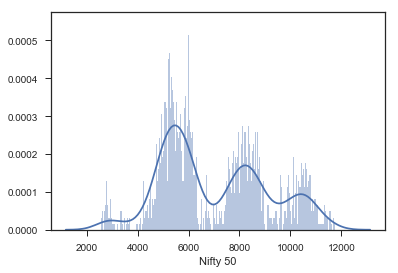

In [253]:
sns.distplot(df['Nifty 50'],bins=365);

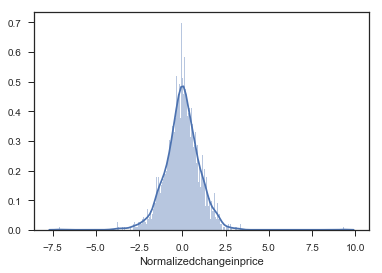

In [254]:
sns.distplot(df['Normalizedchangeinprice'],bins=365);

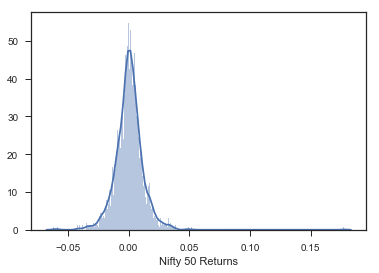

In [255]:
sns.distplot(df['Nifty 50 Returns'],bins=365);

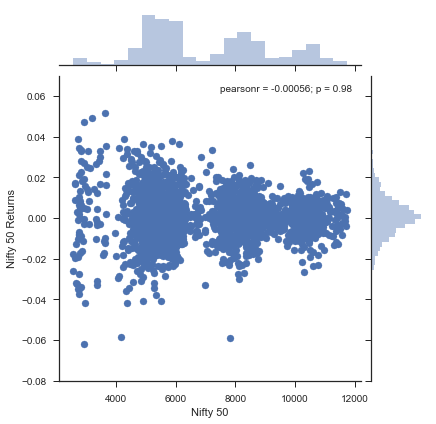

In [256]:
sns.jointplot(x="Nifty 50",y="Nifty 50 Returns",data=df[df['Nifty 50 Returns'] < 0.1] )

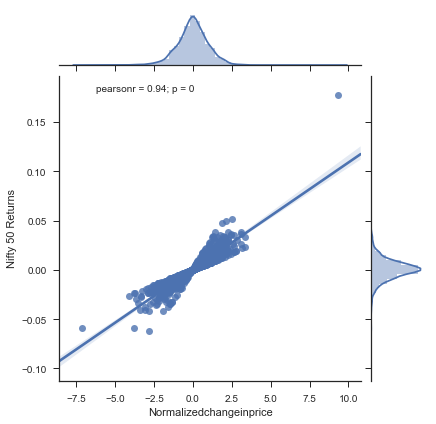

In [257]:
sns.jointplot(x="Normalizedchangeinprice",y="Nifty 50 Returns",data=df,kind='reg')

In [258]:
positivedata=df[df['Normalizedchangeinprice']>=0]
negativedata=df[df['Normalizedchangeinprice']<0]

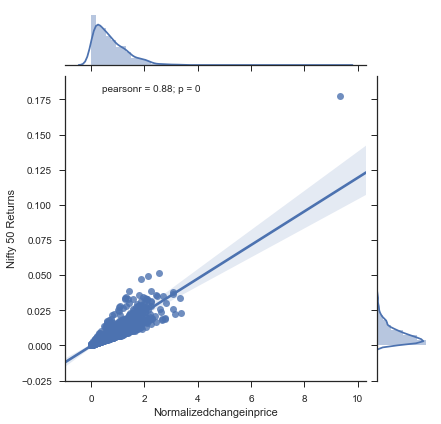

In [259]:
sns.jointplot(x="Normalizedchangeinprice",y="Nifty 50 Returns",data=positivedata,kind='reg')

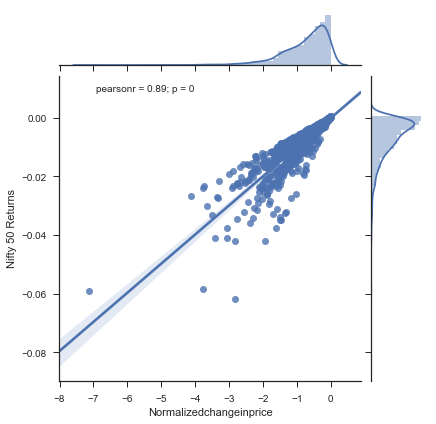

In [260]:
sns.jointplot(x="Normalizedchangeinprice",y="Nifty 50 Returns",data=negativedata,kind='reg')

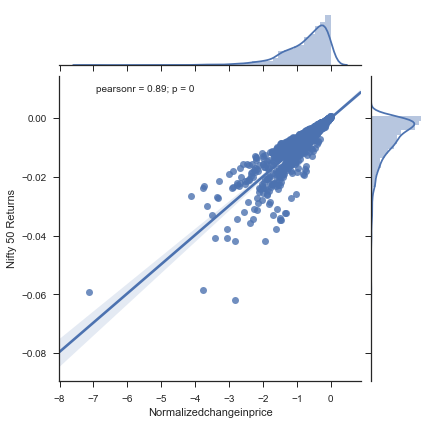

In [261]:
sns.jointplot(x="Normalizedchangeinprice",y="Nifty 50 Returns",data=negativedata,kind='reg')

In [262]:
from scipy.optimize import curve_fit 
  
from matplotlib import pyplot as plt 

In [263]:

from scipy import optimize

def test_func1(x, a, b):
    return a * (x)+b

params, params_covariance = optimize.curve_fit(test_func1, positivedata['Normalizedchangeinprice'], positivedata['Nifty 50 Returns'],
                                               p0=[2,2])

print(params)

[ 0.011948   -0.00025198]


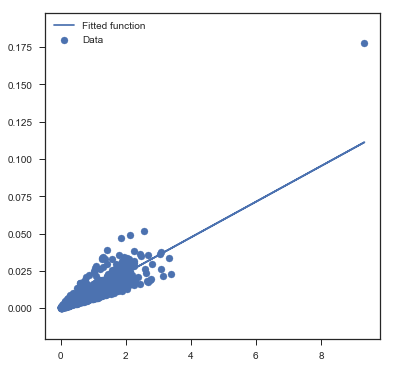

In [264]:
plt.figure(figsize=(6,6))
plt.scatter(positivedata['Normalizedchangeinprice'], positivedata['Nifty 50 Returns'], label='Data')
plt.plot(positivedata['Normalizedchangeinprice'], test_func1(positivedata['Normalizedchangeinprice'], params[0], params[1]),
        label='Fitted function')

plt.legend(loc='best')

plt.show()

In [265]:
def test_func2(x, a, b):
    return a * (x)+b

params, params_covariance = optimize.curve_fit(test_func1,negativedata['Normalizedchangeinprice'], negativedata['Nifty 50 Returns'],
                                               p0=[2,2])

print(params)

[ 9.93654191e-03 -6.27350900e-05]


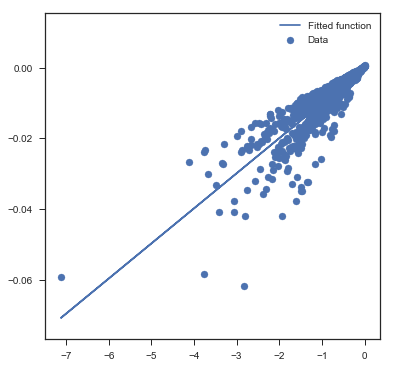

In [266]:
plt.figure(figsize=(6,6))
plt.scatter(negativedata['Normalizedchangeinprice'], negativedata['Nifty 50 Returns'], label='Data')
plt.plot(negativedata['Normalizedchangeinprice'], test_func2(negativedata['Normalizedchangeinprice'], params[0], params[1]),
        label='Fitted function')

plt.legend(loc='best')

plt.show()

In [267]:
export_excel = df1.describe().to_excel ('C:\\Users\\Utkarsh\\Desktop\\Nifty50.xlsx', index = None, header=True)

In [268]:
df1.columns


Index(['Date', 'Nifty 50', 'Asian Paints Ltd.', 'Bharat Petroleum Corpn. Ltd.',
       'Britannia Industries Ltd.', 'Cipla Ltd.',
       'Dr. Reddy Laboratories Ltd.', 'Eicher Motors Ltd.',
       'G A I L (India) Ltd.', 'Grasim Industries Ltd.',
       'H C L Technologies Ltd.', 'Hero Motocorp Ltd.',
       'Hindustan Unilever Ltd.', 'Housing Development Finance Corpn. Ltd.',
       'I T C Ltd.', 'Indian Oil Corpn. Ltd.', 'Infosys Ltd.',
       'Kotak Mahindra Bank Ltd.', 'Larsen & Toubro Ltd.',
       'Mahindra & Mahindra Ltd.', 'Maruti Suzuki India Ltd.', 'N T P C Ltd.',
       'Oil & Natural Gas Corpn. Ltd.', 'Reliance Industries Ltd.',
       'State Bank Of India', 'Tata Consultancy Services Ltd.',
       'Tata Motors Ltd.', 'Tata Steel Ltd.', 'Titan Company Ltd.',
       'U P L Ltd.', 'Ultratech Cement Ltd.', 'Wipro Ltd.', 'Yes Bank Ltd.',
       'Zee Entertainment Enterprises Ltd.'],
      dtype='object')

In [269]:
x=df1[['Nifty 50', 'Asian Paints Ltd.', 'Bharat Petroleum Corpn. Ltd.',
       'Britannia Industries Ltd.', 'Cipla Ltd.',
       'Dr. Reddy Laboratories Ltd.', 'Eicher Motors Ltd.',
       'G A I L (India) Ltd.', 'Grasim Industries Ltd.',
       'H C L Technologies Ltd.', 'Hero Motocorp Ltd.',
       'Hindustan Unilever Ltd.', 'Housing Development Finance Corpn. Ltd.',
       'I T C Ltd.', 'Indian Oil Corpn. Ltd.', 'Infosys Ltd.',
       'Kotak Mahindra Bank Ltd.', 'Larsen & Toubro Ltd.',
       'Mahindra & Mahindra Ltd.', 'Maruti Suzuki India Ltd.', 'N T P C Ltd.',
       'Oil & Natural Gas Corpn. Ltd.', 'Reliance Industries Ltd.',
       'State Bank Of India', 'Tata Consultancy Services Ltd.',
       'Tata Motors Ltd.', 'Tata Steel Ltd.', 'Titan Company Ltd.',
       'U P L Ltd.', 'Ultratech Cement Ltd.', 'Wipro Ltd.', 'Yes Bank Ltd.',
       'Zee Entertainment Enterprises Ltd.']].values

In [270]:
df1.head()

,Date,Nifty 50,Asian Paints Ltd.,Bharat Petroleum Corpn. Ltd.,Britannia Industries Ltd.,Cipla Ltd.,Dr. Reddy Laboratories Ltd.,Eicher Motors Ltd.,G A I L (India) Ltd.,Grasim Industries Ltd.,...,State Bank Of India,Tata Consultancy Services Ltd.,Tata Motors Ltd.,Tata Steel Ltd.,Titan Company Ltd.,U P L Ltd.,Ultratech Cement Ltd.,Wipro Ltd.,Yes Bank Ltd.,Zee Entertainment Enterprises Ltd.
0,2008-12-31,2959.15,89.50,62.68,132.25,186.60,468.65,234.95,116.02,243.97,...,128.88,119.47,31.63,213.86,46.31,108.05,385.50,52.52,15.04,69.92
1,2009-01-01,3033.45,88.80,60.02,131.73,192.95,467.6,235.00,116.92,245.35,...,131.63,124.21,33.74,225.19,46.97,108.55,395.50,55.83,15.60,71.80
2,2009-01-02,3046.75,90.25,60.61,132.63,191.60,468,240.05,116.80,242.79,...,133.19,124.58,34.84,226.07,47.76,116.25,386.30,54.83,16.28,69.05
3,2009-01-05,3121.45,91.53,59.86,134.23,190.95,471.25,239.95,120.40,246.96,...,136.08,128.81,35.31,241.83,48.04,118.90,384.85,55.29,17.65,75.05
4,2009-01-06,3112.80,91.83,62.24,134.01,192.95,486.7,237.40,118.63,266.97,...,132.29,126.60,36.89,243.26,46.15,115.85,429.20,54.61,17.53,73.97


In [271]:
Skewness=df1.skew()
print(Skewness)


Nifty 50                                   0.327436
Asian Paints Ltd.                          0.406615
Bharat Petroleum Corpn. Ltd.               0.419497
Britannia Industries Ltd.                  1.011645
Cipla Ltd.                                -0.111500
Eicher Motors Ltd.                         0.555327
G A I L (India) Ltd.                       2.667765
Grasim Industries Ltd.                     0.119603
H C L Technologies Ltd.                   -0.135135
Hero Motocorp Ltd.                        -0.410993
Hindustan Unilever Ltd.                    0.764773
Housing Development Finance Corpn. Ltd.    0.543819
I T C Ltd.                                -0.071338
Indian Oil Corpn. Ltd.                     2.638269
Infosys Ltd.                              -0.034046
Kotak Mahindra Bank Ltd.                   0.708158
Larsen & Toubro Ltd.                      -0.456862
Mahindra & Mahindra Ltd.                   0.076932
Maruti Suzuki India Ltd.                   0.989013
N T P C Ltd.

In [272]:
export_excel = df1.skew().to_excel ('C:\\Users\\Utkarsh\\Desktop\\Skewness.xlsx', index = None, header=True)

In [273]:
export_excel = df1.kurt().to_excel ('C:\\Users\\Utkarsh\\Desktop\\Kurtosis.xlsx', index = None, header=True)

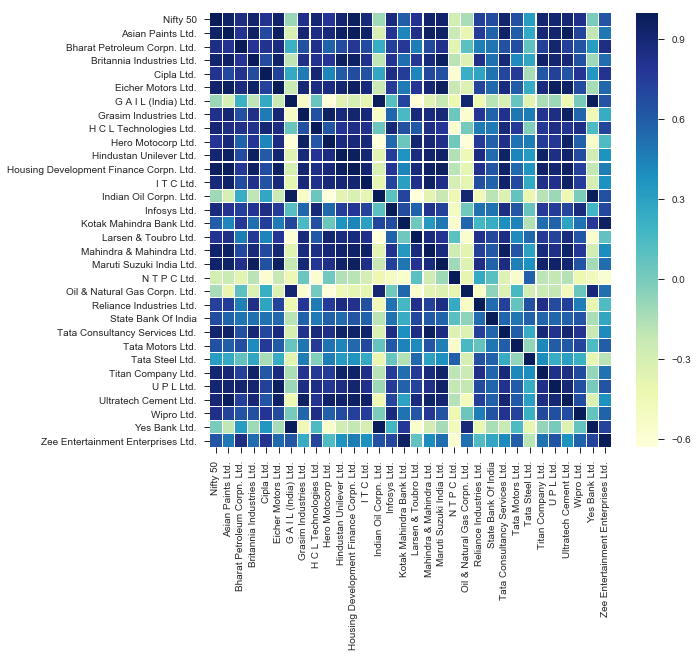

In [274]:
corrmat = df1.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


In [275]:
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm').to_excel("Heatmap.xlsx", engine="openpyxl")

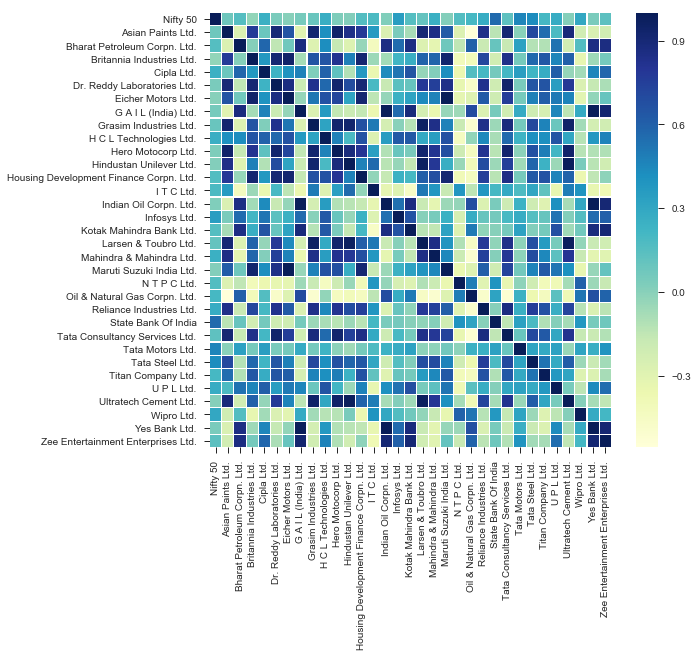

In [276]:
corrmat = returns.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

NOW ANALYSIS FOR VOLUMES TRADED

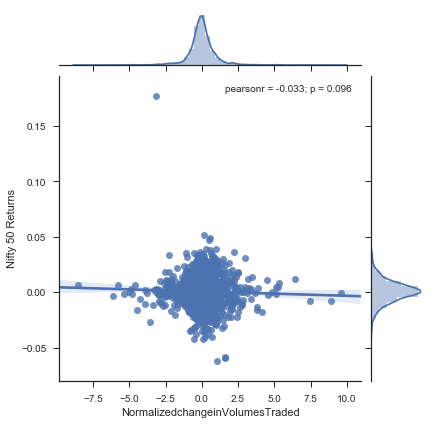

In [279]:
sns.jointplot(x="NormalizedchangeinVolumesTraded",y="Nifty 50 Returns",data=df,kind='reg')

In [280]:
df2=pd.read_excel ('C:\\Users\\Utkarsh\\Desktop\\final.xlsx')

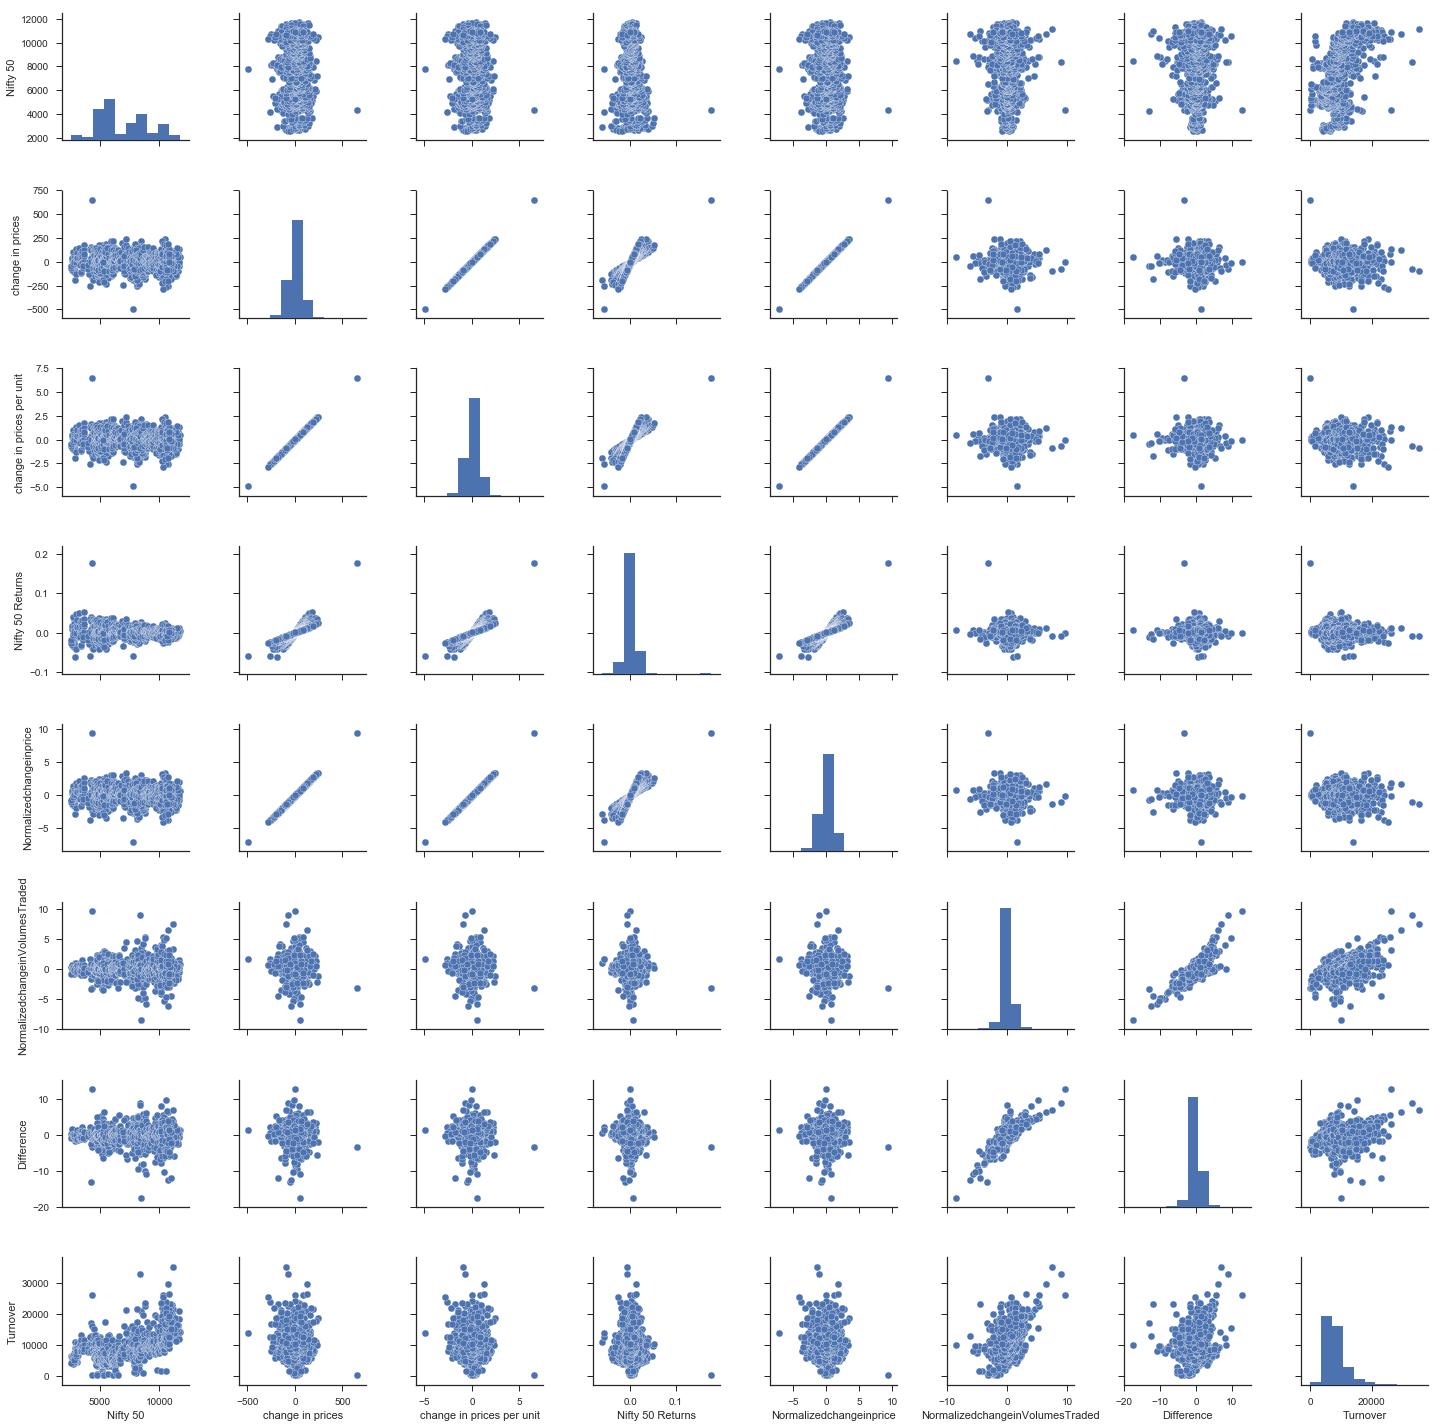

In [284]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)


Although empirical studies have provided sufficient evidence for the association between changes in stock prices and changes in volume, few attempts have been concerned with the asym-metry  of  such  a  relation.  The  question  here  is:  do  rising  stock  prices  affect  trading  volume  in  a  significantly different way from declining prices? This paper intends to answer this question using data on nine stock markets in eight different countries. The inclusion of such a number of markets will help us draw more sound and robust conclusions. 

(15) (PDF) Modeling Asymmetry in the Price-Volume Relation: Evidence from Nine Stock Markets. Available from: https://www.researchgate.net/publication/238664826_Modeling_Asymmetry_in_the_Price-Volume_Relation_Evidence_from_Nine_Stock_Markets [accessed Sep 26 2019].

In [285]:
datapospricechangevolumes=df[df['change in prices']>0]

In [286]:
datapospricechangevolumes.head()

,Date,Nifty 50,change in prices,change in prices per unit,Nifty 50 Returns,Normalizedchangeinprice,NormalizedchangeinVolumesTraded,Difference,Turnover
1,2009-01-01,3033.45,74.30,0.7430,0.025109,1.024124,-0.523448,-0.523448,4302.54
2,2009-01-02,3046.75,13.30,0.1330,0.004384,0.145579,0.680206,1.203654,6132.72
3,2009-01-05,3121.45,74.70,0.7470,0.024518,1.029885,0.224487,-0.455719,6737.94
9,2009-01-14,2835.30,90.35,0.9035,0.032915,1.255282,-0.270083,-0.116902,5683.41
11,2009-01-16,2828.45,91.75,0.9175,0.033526,1.275445,-0.317829,-0.312328,4817.92


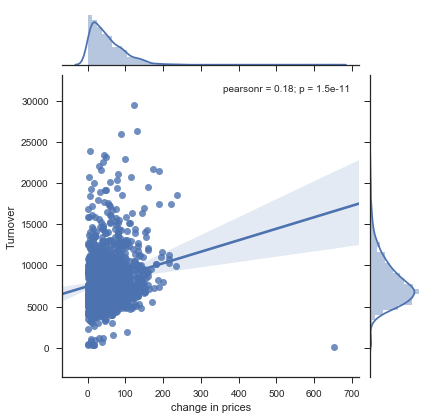

In [298]:
sns.jointplot(x="change in prices",y="Turnover",data=datapospricechangevolumes,kind='reg')

The  practical  implication  is  that,  because  of  the  strong  association  between  positive  price  change  and  volume,  investors  preferring  to  trade  large number of shares should do so when stock prices are rising. 

(15) (PDF) Modeling Asymmetry in the Price-Volume Relation: Evidence from Nine Stock Markets. Available from: https://www.researchgate.net/publication/238664826_Modeling_Asymmetry_in_the_Price-Volume_Relation_Evidence_from_Nine_Stock_Markets [accessed Sep 26 2019].

In [299]:
datanegpricechangevolumes=df[df['change in prices']<0]

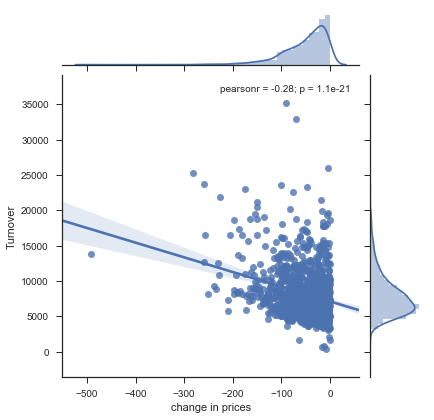

In [300]:
sns.jointplot(x="change in prices",y="Turnover",data=datanegpricechangevolumes,kind='reg')

In [293]:
datazeropricechangevolumes=df[df['change in prices']==0]

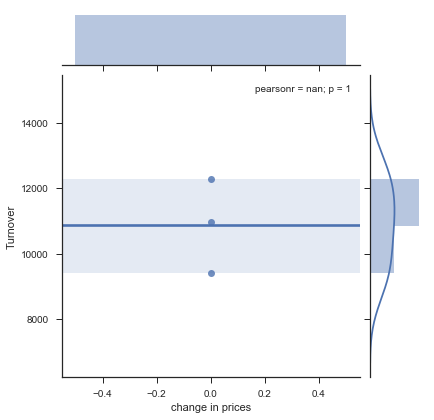

In [294]:
sns.jointplot(x="change in prices",y="Turnover",data=datazeropricechangevolumes,kind='reg')